## tSNE on MNIST
goals: import MNIST, look at some images, perform normal tSNE on them (coloured and without colours), try improved version of MNIST with adapted alpha and h 
questions: perform PCA first? 

### loading the data

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np 

%matplotlib inline
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [47]:
X = np.zeros((x_train.shape[0], 784))
for i in range(x_train.shape[0]):
    X[i] = x_train[i].flatten()
X = pd.DataFrame(X)
Y = pd.DataFrame(y_train)
X.shape

(60000, 784)

In [58]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# shuffle dataset and take random 20% for visualisation with tSNE 
X_sample = X.sample(frac=0.2, random_state=10).reset_index(drop=True)
Y_sample = Y.sample(frac=0.2, random_state=10).reset_index(drop=True)
X_sample.shape

(12000, 31)

### standard t-SNE 

In [ ]:
import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE()
tsne_results = tsne.fit_transform(X_sample.values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
X_sample['label'] = Y_sample

t-SNE done! Time elapsed: 187.43048095703125 seconds


/var/folders/4d/3496lhrx28308spwb6q8gb800000gn/T/ipykernel_84559/388276416.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Paired'),


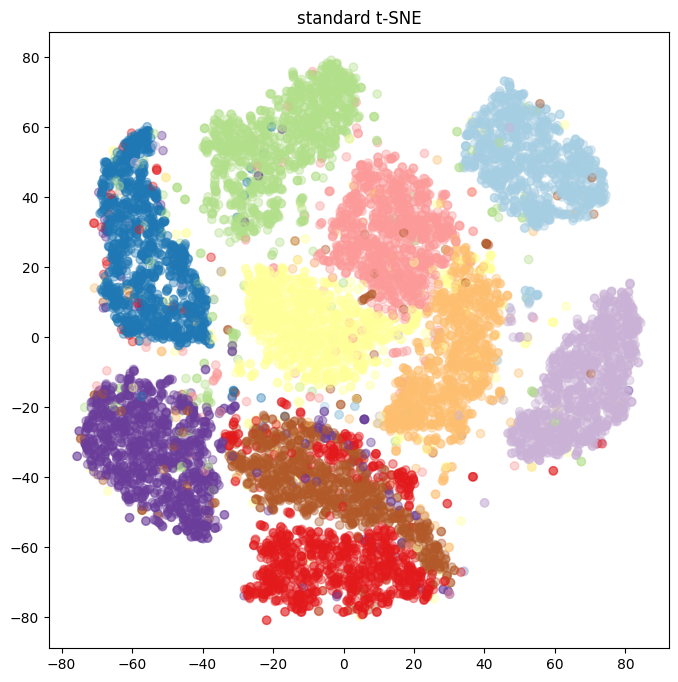

In [12]:
# Create the figure
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, title='standard t-SNE')
# Create the scatter
ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=X_sample['label'], 
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=0.4)
plt.show()

### improved (?) version of t-SNE with parameters suggested in Linderman & Steinerberger paper
they suggest: 
- $\alpha = 0.1n$ (early exaggeration parameter, standard is $\alpha=12$)
- $h = 1$ (step size / learning rate during gradient descent)

In [52]:
n = X_sample.shape[0]
n

12000

In [53]:
time_start = time.time()
tsne = TSNE(early_exaggeration= 0.1*n, learning_rate=1, max_iter=2000)
tsne_results = tsne.fit_transform(X_sample.values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
X_sample['label'] = Y_sample

t-SNE done! Time elapsed: 53.09286189079285 seconds


/var/folders/4d/3496lhrx28308spwb6q8gb800000gn/T/ipykernel_84559/2103246916.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Paired'),


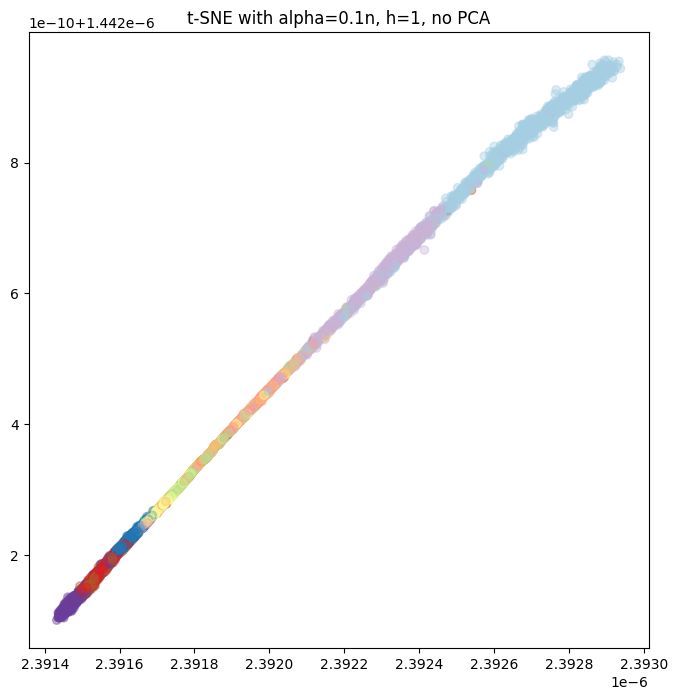

In [54]:
# Create the figure
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, title='t-SNE with alpha=0.1n, h=1, no PCA')
# Create the scatter
ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=X_sample['label'], 
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=0.4)
plt.show()

### adapted t-SNE with PCA and centered data
PCA & rescaling before t-SNE

In [64]:
# make a PCAed version of the data 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# reduce dimensionality of data down to 30 before applying t-SNE
scaler = StandardScaler()
pca = PCA(n_components=30, random_state=10)
X_reduced = pca.fit_transform(scaler.fit_transform(X))
X_reduced = pd.DataFrame(X_reduced)
X_reduced['label'] = Y

In [65]:
# sample parts of the dataset 
X_reduced_sample = X_reduced.sample(frac=0.2, random_state=10).reset_index(drop=True)
X_reduced_sample.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,label
0,1.240605,12.367079,7.660982,11.053041,0.337051,11.553386,-6.555512,2.772902,4.127402,10.137129,...,1.217483,-2.270138,3.547008,-5.959299,-10.895817,0.042336,11.807020,-2.140547,4.795029,3
1,0.863445,-4.289714,-7.162688,7.342312,-1.302948,-1.809941,4.019256,0.509416,6.036995,2.814215,...,2.339330,-2.423822,4.958929,2.702472,2.256240,-0.137740,1.266835,-1.955047,-3.698871,5
2,13.227402,0.263634,2.535592,2.153671,10.386318,-2.178670,5.550678,4.101597,2.063597,-3.756511,...,-4.592312,1.622409,0.968256,1.575530,-3.527769,1.692794,-0.781363,-1.298834,0.214389,0
3,-0.914390,-1.817413,3.517392,-1.740421,6.136033,-5.640709,-1.267368,3.844728,1.810540,0.316549,...,1.361795,-1.595046,-0.711235,1.392366,0.060216,-1.538579,-3.284847,-1.023047,-0.739417,6
4,-4.949948,-6.308316,3.511214,-3.994215,-0.283491,1.854702,-2.778533,2.385330,3.663693,-4.545889,...,-0.097568,-2.171556,1.991791,0.218068,0.644330,1.069880,2.023349,0.239121,1.074424,6


In [70]:
time_start = time.time()
tsne = TSNE(perplexity=10, early_exaggeration=0.1*n, learning_rate=1, max_iter=2000)
tsne_results = tsne.fit_transform(X_reduced_sample.values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
X_reduced_sample['label'] = Y_sample

t-SNE done! Time elapsed: 293.3201048374176 seconds


/var/folders/4d/3496lhrx28308spwb6q8gb800000gn/T/ipykernel_84559/1785907850.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Paired'),


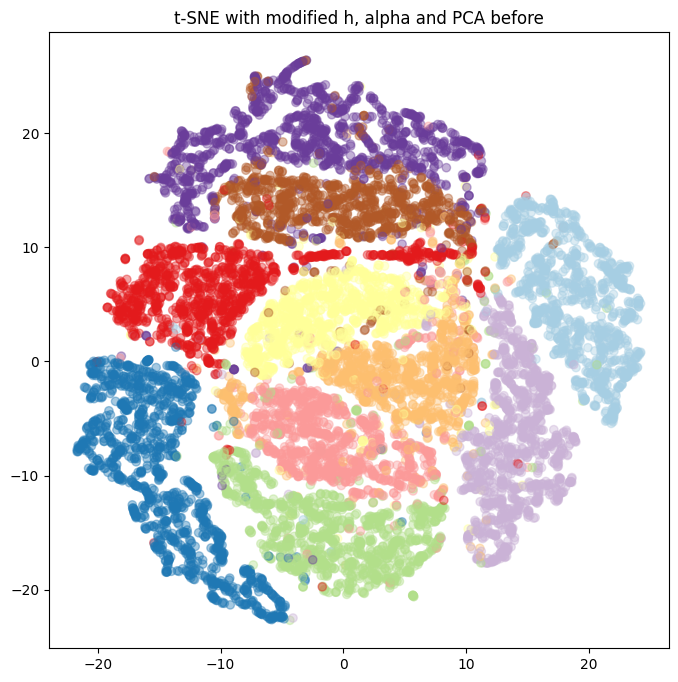

In [71]:
# Create the figure
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, title='t-SNE with modified h, alpha and PCA before')
# Create the scatter
ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=X_reduced_sample['label'], 
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=0.4)
plt.show()